In [1]:
import numpy as np
import importlib
import hopfieldNetwork as hn
import matplotlib.pyplot as plt
import matplotlib

In [2]:
importlib.reload(hn)

<module 'hopfieldNetwork' from 'c:\\Users\\User\\Desktop\\KTH\\ANN\\lab 2\\ann_lab1\\lab3\\hopfieldNetwork.py'>

In [3]:
N2 = 1024
log2N2 = int(np.log2(N2))
pictures_patterns = np.loadtxt('pict.dat', delimiter=',')
pictures_patterns = pictures_patterns.reshape((11, 1024))
pictures_patterns.shape

(11, 1024)

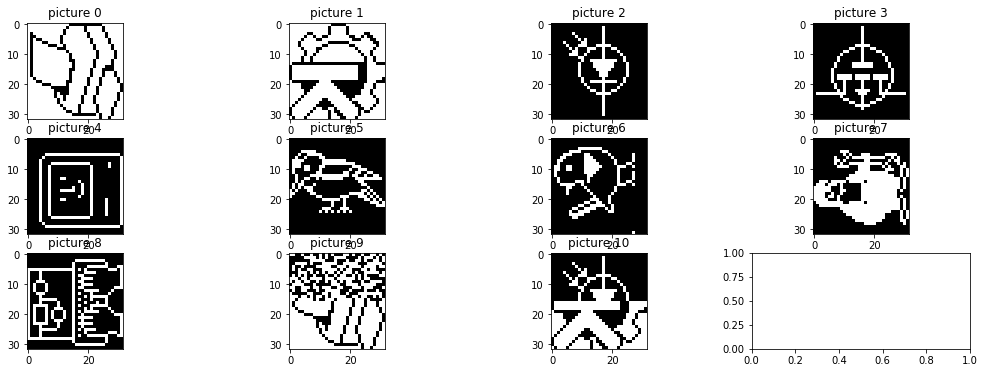

In [4]:
pictures = pictures_patterns.reshape((11, 32, 32))
fig, ax = plt.subplots(3, 4, figsize=(18,6))
for i, pic in enumerate(pictures):
    ax[i//4, i%4].imshow(pic, cmap="binary")
    ax[i//4, i%4].set_title(f"picture {i}")

### 3.5.1

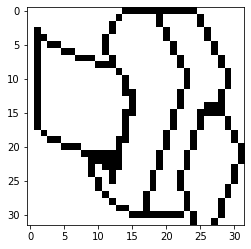

In [5]:
plt.imshow(pictures_patterns[:1,:].reshape((32,32)), cmap="binary")

Fixed Point found after 100 iterations!
This pattern is an attractor!
[-1. -1. -1. ... -1. -1. -1.] 

1


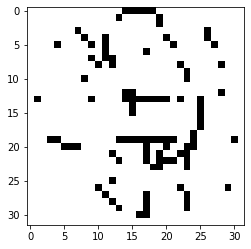

In [6]:
hop_net2 = hn.HopfieldNetwork(np.concatenate((pictures_patterns[7:8,:],pictures_patterns[:3,:]),axis=0))
_, pattern, _ = hop_net2.update_rule(pictures_patterns[0],max_iter=100)
print(hop_net2.check_capacity())
plt.imshow(pattern.reshape((32,32)), cmap="binary")

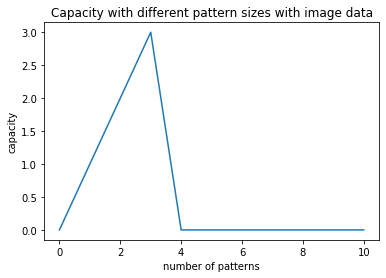

In [7]:
importlib.reload(hn)
capacity = list()
rng = range(11)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(pictures_patterns[:i,:])
    capacity.append(hop_net2.check_capacity())
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("capacity")
plt.title("Capacity with different pattern sizes with image data")
plt.show()

In [8]:
pictures_patterns[3,:].reshape(1,-1)

array([[1., 1., 1., ..., 1., 1., 1.]])

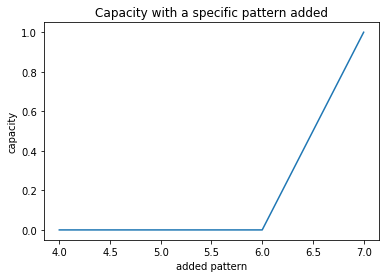

In [9]:
importlib.reload(hn)
capacity = list()
rng = [4,5,6,7]
for i in rng:
    hop_net2 = hn.HopfieldNetwork(np.concatenate((pictures_patterns[:3,:],pictures_patterns[i,:].reshape(1,-1)),axis=0))
    capacity.append(hop_net2.check_capacity())
plt.plot(rng,capacity)
plt.xlabel("added pattern")
plt.ylabel("capacity")
plt.title("Capacity with a specific pattern added")
plt.show()

the drop in performance was aprupt and goes even to zero, which is weird

### 3.5.2

In [10]:
random_patterns = np.random.binomial(1,0.5,(100,1024))*2-1
importlib.reload(hn)
capacity = list()
rng = range(300)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
    capacity.append(hop_net2.check_capacity())

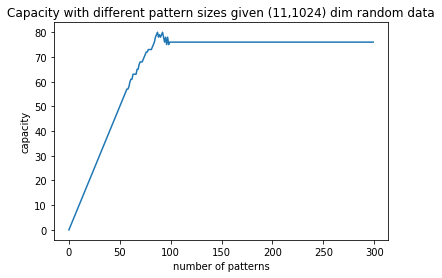

In [11]:
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("capacity")
plt.title("Capacity with different pattern sizes given (11,1024) dim random data")
plt.show()

### 3.5.3

The reason that we can store more, is that it is more likely that our random patterns are actually orthotogonal to each other (do the patterns need to be orthotogonal or the features)

### 3.5.4

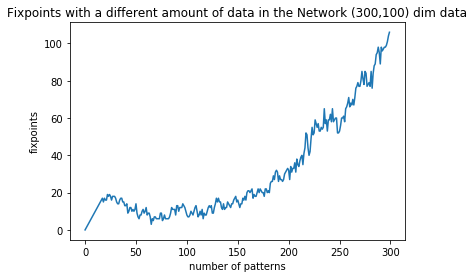

In [12]:
np.random.seed(3)
random_patterns = np.random.binomial(1,0.5,(300,100))*2-1
importlib.reload(hn)
capacity = list()
rng = range(300)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
    capacity.append(hop_net2.check_capacity(noise=0))
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("fixpoints")
plt.title("Fixpoints with a different amount of data in the Network (300,100) dim data")
plt.show()

In [19]:
np.random.seed(3)
random_patterns = np.random.binomial(1,0.5,(300,100))*2-1
importlib.reload(hn)
capacity = list()
rng = range(300)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
    capacity.append(hop_net2.check_capacity(noise=1))

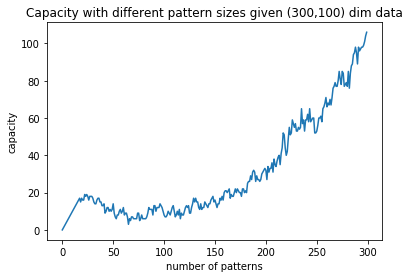

In [20]:
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("capacity")
plt.title("Capacity with different pattern sizes given (300,100) dim data")
plt.show()

### 3.5.5

### 3.5.6

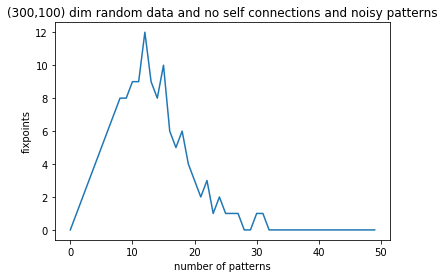

In [15]:
random_patterns = np.random.binomial(1,0.5,(300,100))*2-1
importlib.reload(hn)
capacity = list()
rng = range(50)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
    hop_net2.zero_self_connection()
    capacity.append(hop_net2.check_capacity(noise=0))
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("fixpoints")
plt.title("(300,100) dim random data and no self connections and noisy patterns")
plt.show()

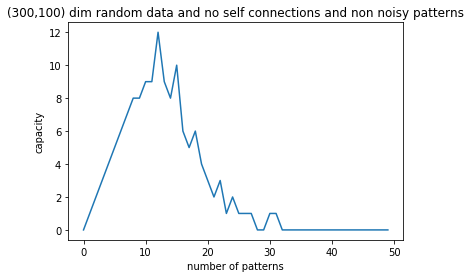

In [16]:
random_patterns = np.random.binomial(1,0.5,(300,100))*2-1
importlib.reload(hn)
capacity = list()
rng = range(50)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
    hop_net2.zero_self_connection()
    capacity.append(hop_net2.check_capacity(noise=0))
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("capacity")
plt.title("(300,100) dim random data and no self connections and non noisy patterns")
plt.show()

### 3.5.7

In [17]:
p = [0.01,0.05,0.1,0.2,0.3,0.4]
importlib.reload(hn)
max_capacity = list()
rng = range(50)
for j in p:
    random_patterns = np.random.binomial(1,j,(300,100))*2-1
    capacity = list()
    for i in rng:
        hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
        hop_net2.zero_self_connection()
        capacity.append(hop_net2.check_capacity())
    max_capacity.append(max(capacity))

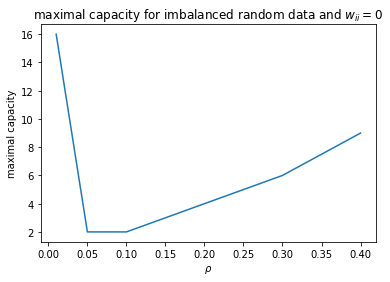

In [18]:
plt.plot(p,max_capacity)
plt.xlabel(r"$\rho$")
plt.ylabel("maximal capacity")
plt.title(r"maximal capacity for imbalanced random data and $w_{ii} = 0$")
plt.show()